#### Seattle_travel_recommendation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# read calendar.csv
df_cal = pd.read_csv('./calendar.csv')
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [2]:
# read listing.csv
df_lis = pd.read_csv('./listings.csv')
df_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# read reviews.csv
df_rev = pd.read_csv('./reviews.csv')
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


#### Best rated Airbnb in Seattle

In [4]:
#Only use review variables and drop any rows with missing values
num_vars = df_lis[['id', 'listing_url', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']]
num_vars.head(30)
print('original dataset size:')
print(num_vars.size)

#Drop the rows with missing reviews
drop_rating_df = num_vars.dropna(subset=['review_scores_rating'], axis=0)
drop_accuracy_df = drop_rating_df.dropna(subset=['review_scores_accuracy'], axis=0)
drop_cleanliness_df = drop_accuracy_df.dropna(subset=['review_scores_cleanliness'], axis=0)
drop_checkin_df = drop_cleanliness_df.dropna(subset=['review_scores_checkin'], axis=0)
drop_communication_df = drop_checkin_df.dropna(subset=['review_scores_communication'], axis=0)
drop_location_df = drop_communication_df.dropna(subset=['review_scores_location'], axis=0)
drop_price_df = drop_location_df.dropna(subset=['price'], axis=0)
drop_value_df = drop_price_df.dropna(subset=['review_scores_value'], axis=0)

print('drop_rating_df size:')
print(drop_rating_df.size)

print('drop_accuracy_df size:')
print(drop_accuracy_df.size)

print('drop_cleanliness_df size:')
print(drop_cleanliness_df.size)

print('drop_checkin_df size:')
print(drop_checkin_df.size)

print('drop_communication_df size:')
print(drop_communication_df.size)

print('drop_location_df size:')
print(drop_location_df.size)

print('drop_price_df size:')
print(drop_price_df.size)

print('drop_value_df size:')
print(drop_value_df.size)

original dataset size:
38180
drop_rating_df size:
31710
drop_accuracy_df size:
31600
drop_cleanliness_df size:
31600
drop_checkin_df size:
31590
drop_communication_df size:
31590
drop_location_df size:
31590
drop_price_df size:
31590
drop_value_df size:
31580


In [5]:
# calculate mean of all ratings and create new column for that in drop_value_df dataframe
drop_value_df['mean_rating'] = drop_value_df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].mean(axis=1)

C:\Users\z622912\AppData\Local\Temp\ipykernel_31964\2359710424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_value_df['mean_rating'] = drop_value_df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].mean(axis=1)


In [6]:
# transform price from string into float values for later calculation
drop_value_df['price'] = drop_value_df['price'].apply(lambda x : x[1:] if x.startswith("$") else x)
drop_value_df['price'] = drop_value_df['price'].apply(lambda x :  x.replace(",", ""))
drop_value_df['price'].astype(float)

C:\Users\z622912\AppData\Local\Temp\ipykernel_31964\1651801728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_value_df['price'] = drop_value_df['price'].apply(lambda x : x[1:] if x.startswith("$") else x)
C:\Users\z622912\AppData\Local\Temp\ipykernel_31964\1651801728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_value_df['price'] = drop_value_df['price'].apply(lambda x :  x.replace(",", ""))


0        85.0
1       150.0
2       975.0
4       450.0
5       120.0
        ...  
3810    154.0
3811     65.0
3812     95.0
3813    359.0
3814     79.0
Name: price, Length: 3158, dtype: float64

In [7]:
# calculate mean review divided by price
drop_value_df['rev/price']=drop_value_df['mean_rating']/drop_value_df['price'].astype(float)

C:\Users\z622912\AppData\Local\Temp\ipykernel_31964\3182202663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_value_df['rev/price']=drop_value_df['mean_rating']/drop_value_df['price'].astype(float)


In [8]:
# show header with new column 'rev/price'
drop_value_df.head(10)

,id,listing_url,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,mean_rating,rev/price
0,241032,https://www.airbnb.com/rooms/241032,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.00,22.000000,0.258824
1,953595,https://www.airbnb.com/rooms/953595,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150.00,22.285714,0.148571
2,3308979,https://www.airbnb.com/rooms/3308979,97.0,10.0,10.0,10.0,10.0,10.0,10.0,975.00,22.428571,0.023004
4,278830,https://www.airbnb.com/rooms/278830,92.0,9.0,9.0,10.0,10.0,9.0,9.0,450.00,21.142857,0.046984
5,5956968,https://www.airbnb.com/rooms/5956968,95.0,10.0,10.0,10.0,10.0,10.0,10.0,120.00,22.142857,0.184524
6,1909058,https://www.airbnb.com/rooms/1909058,99.0,10.0,10.0,10.0,10.0,10.0,10.0,80.00,22.714286,0.283929
7,856550,https://www.airbnb.com/rooms/856550,97.0,10.0,10.0,10.0,10.0,9.0,10.0,60.00,22.285714,0.371429
8,4948745,https://www.airbnb.com/rooms/4948745,97.0,10.0,9.0,10.0,9.0,10.0,10.0,90.00,22.142857,0.246032
9,2493658,https://www.airbnb.com/rooms/2493658,97.0,10.0,10.0,10.0,10.0,10.0,9.0,150.00,22.285714,0.148571
10,175576,https://www.airbnb.com/rooms/175576,97.0,10.0,10.0,10.0,10.0,10.0,10.0,95.00,22.428571,0.236090


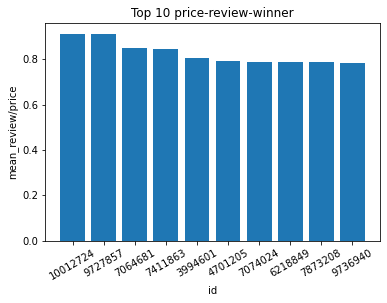

In [9]:
# plot top 10 price-review-winner
best10 = drop_value_df.nlargest(10, 'rev/price')
# Importing the matplotlib library
import matplotlib.pyplot as plt
# Categorical data: Country names
ids = best10['id'].astype(str).tolist()
# Integer value interms of death counts
rev_price = best10['rev/price'].tolist()
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.bar(ids, rev_price)
plt.title('Top 10 price-review-winner')
plt.xlabel('id')
plt.xticks(rotation=30)
plt.ylabel('mean_review/price')
# Displaying the bar plot
plt.show()

In [10]:
# separate date column into yera, month, day columns for later use
int(df_cal['date'][0].split('-')[0])
df_cal['year'] = df_cal['date'].apply(lambda x : int(x.split('-')[0]))
df_cal['month'] = df_cal['date'].apply(lambda x : int(x.split('-')[1]))
df_cal['day'] = df_cal['date'].apply(lambda x : int(x.split('-')[2]))

In [11]:
# check how many different years are in the dataset
df_cal['year'].value_counts()

2016    1385934
2017       7636
Name: year, dtype: int64

In [12]:
# use only year 2016, because there are the most data and I want to prevent to overlap different years
df_cal_2016 = df_cal.loc[df_cal['year'] == 2016]

avail=[]
month=[]
for jj in range(1,13):
    df_temp = df_cal_2016.loc[df_cal['month'] == jj]
    avail.append(df_temp['available'].value_counts()['t']/len(df_temp['available'])*100)
    month.append(jj)
    
print(month)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [13]:
# drop nans
df_cal_2016_nan = df_cal_2016.dropna(subset=['price'], axis=0)
# convert price to only numbers (preprocessing for later float conversion)
df_cal_2016_nan['price'] = df_cal_2016_nan['price'].apply(lambda x : x[1:] if x.startswith("$") else x)
df_cal_2016_nan['price'] = df_cal_2016_nan['price'].apply(lambda x :  x.replace(",", ""))

C:\Users\z622912\AppData\Local\Temp\ipykernel_31964\2316158984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_2016_nan['price'] = df_cal_2016_nan['price'].apply(lambda x : x[1:] if x.startswith("$") else x)
C:\Users\z622912\AppData\Local\Temp\ipykernel_31964\2316158984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_2016_nan['price'] = df_cal_2016_nan['price'].apply(lambda x :  x.replace(",", ""))


In [14]:
# calculate mean price for different months
price = []
for jj in range(1,13):
    df_temp = df_cal_2016_nan.loc[df_cal_2016_nan['month'] == jj]
    price.append(df_temp['price'].astype(float).mean())

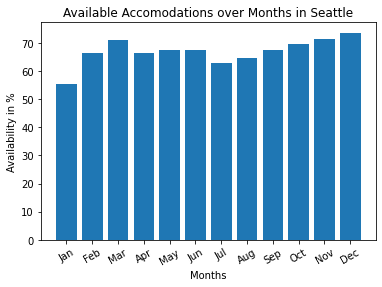

January are the busiest month in the year, In March and December are a lot of accomodations available. It looks like that in summer are a little bit more visitors in Seattle than in winter.


In [15]:
# plot Available Accomodations over Months in Seattle
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, avail)
plt.title('Available Accomodations over Months in Seattle')
plt.xlabel('Months')
plt.xticks(rotation=30)
plt.ylabel('Availability in %')
# Displaying the bar plot
plt.show()
print('January are the busiest month in the year, In March and December are a lot of accomodations available. It looks like that in summer are a little bit more visitors in Seattle than in winter.')

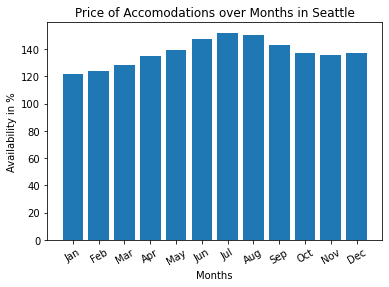

The prices are getting higher during summer than in winter. The maximum is reached in july and the minimum in december.


In [16]:
# plot Price of Accomodations over Months in Seattle
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, price)
plt.title('Price of Accomodations over Months in Seattle')
plt.xlabel('Months')
plt.xticks(rotation=30)
plt.ylabel('Availability in %')
# Displaying the bar plot
plt.show()

print('The prices are getting higher during summer than in winter. The maximum is reached in july and the minimum in december.')

In [21]:
avail_np = np.array(avail)
price_np = np.array(price)

np.corrcoef(avail_np, price_np)[0,1]

0.1260832494969748

There is only a very small positive corellation between the price and the availability per months. In summer is the a lower availability an therefore the prices are higher than in winter.

1     2275
2      989
4      237
0       92
3       80
6       71
5       28
8       24
7       14
10       2
9        2
11       1
15       1
13       1
12       1
Name: guests_included, dtype: int64


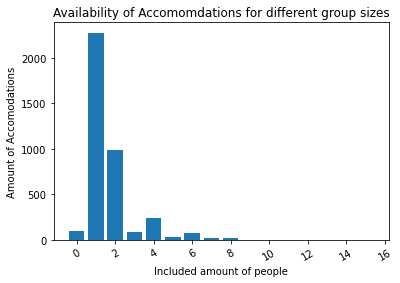

In [18]:
# available accomodations for different group sizes
people_size = []
nr_acc = []
uniq_val = df_lis['guests_included'].unique()
for idx in uniq_val:
    nr_acc.append(df_lis['guests_included'].value_counts()[idx])
    people_size.append(idx)
#df_lis['guests_included'].value_counts()#.to_list()
print(df_lis['guests_included'].value_counts())

# plot Availability of Accomomdations for different group sizes
plt.bar(people_size, nr_acc)
plt.title('Availability of Accomomdations for different group sizes')
plt.xlabel('Included amount of people')
plt.xticks(rotation=30)
plt.ylabel('Amount of Accomodations')
# Displaying the bar plot
plt.show()



It is easy to see, that there are a lot of accommodations for 1 and 2 persons and a few for 3-8 persons. For this study we neglet the possibility to add extra persons in a room. We only focus on the already included amount of people. To have a dataset with at least 10 different accomodations, we use for the next analysis only the accomodations where 1-8 persons are already included.

In [19]:
# cheapest prices and most expensive prices for different group sizes
df_lis['price'] = df_lis['price'].apply(lambda x : x[1:] if x.startswith("$") else x)
df_lis['price'] = df_lis['price'].apply(lambda x :  x.replace(",", ""))

Text(0.5, 1.0, 'total prices over group size')

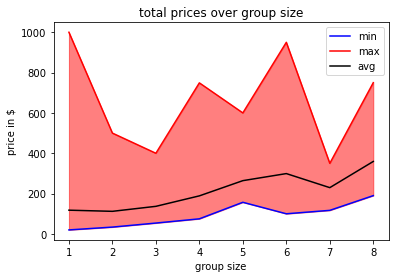

In [20]:
# calculate max, min and average prices for different group sizes
max_price = []
min_price = []
group_size = []
avg_price=[]
for i in range(1,9):
    max_price.append(df_lis.loc[df_lis['guests_included']==i, 'price'].astype(float).max())
    min_price.append(df_lis.loc[df_lis['guests_included']==i, 'price'].astype(float).min())
    avg_price.append(df_lis.loc[df_lis['guests_included']==i, 'price'].astype(float).mean())
    group_size.append(i)

#plot
plt.plot(group_size, min_price,color='blue')
plt.plot(group_size, max_price, color='red')
plt.plot(group_size, avg_price, color='black')
plt.fill_between(group_size, min_price, max_price, color='red', alpha=0.5)
plt.xlabel('group size')
plt.ylabel('price in $')
plt.legend(['min', 'max', 'avg'])
plt.title('total prices over group size')


The min price is roughly increasing with the amount of gropu size. That means it make sense to only search for the group size which you really need, if you want to spend the night very cheap. But there is an exception at 5 persons. So if you are only 5 Persons it could make sense to search also for accomodations for 6 oder 7 persons, because they could be cheaper. The same effect can be seen in the average price. If you are actually 6 Persons you should also search for 7 Persons, because this accomodations are in average cheaper than the 6 Persons accomodations. In total it can be seen that there are only a few very expensive accomodations, because the average cuve is very close to the min curve and far away from the max curve. Interessting fun fact: it is possible to spend a night for a single person for 1000$ in Seattle.